
Missing Values per Column:
actor1                      1
assoc_actor_1         2202336
civilian_targeting    2693854
admin1                   1228
admin2                 100517
admin3                1711164
tags                  2209964
population_best       1300535
dtype: int64

Number of Duplicates: 31703

Summary Statistics:
                          event_date          year  time_precision  \
count                        3346505  3.346505e+06    3.346505e+06   
mean   2021-05-07 14:50:44.355110656  2.020852e+03    1.078965e+00   
min              2015-01-01 00:00:00  2.015000e+03    1.000000e+00   
25%              2019-06-06 00:00:00  2.019000e+03    1.000000e+00   
50%              2021-08-17 00:00:00  2.021000e+03    1.000000e+00   
75%              2023-07-09 00:00:00  2.023000e+03    1.000000e+00   
max              2025-01-31 00:00:00  2.025000e+03    3.000000e+00   
std                              NaN  2.485584e+00    2.880460e-01   

             inter1   interaction     

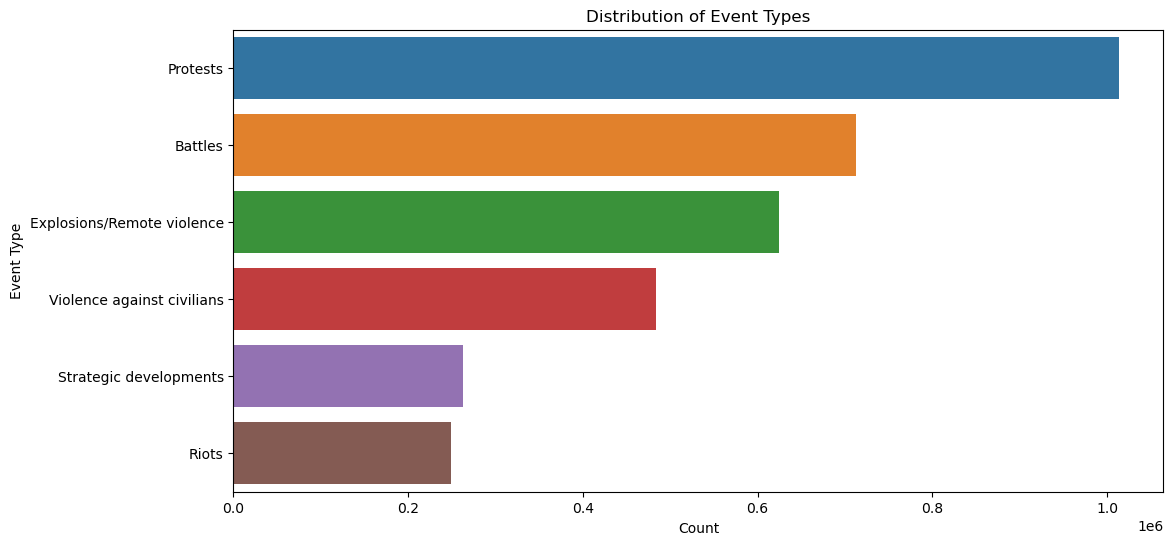

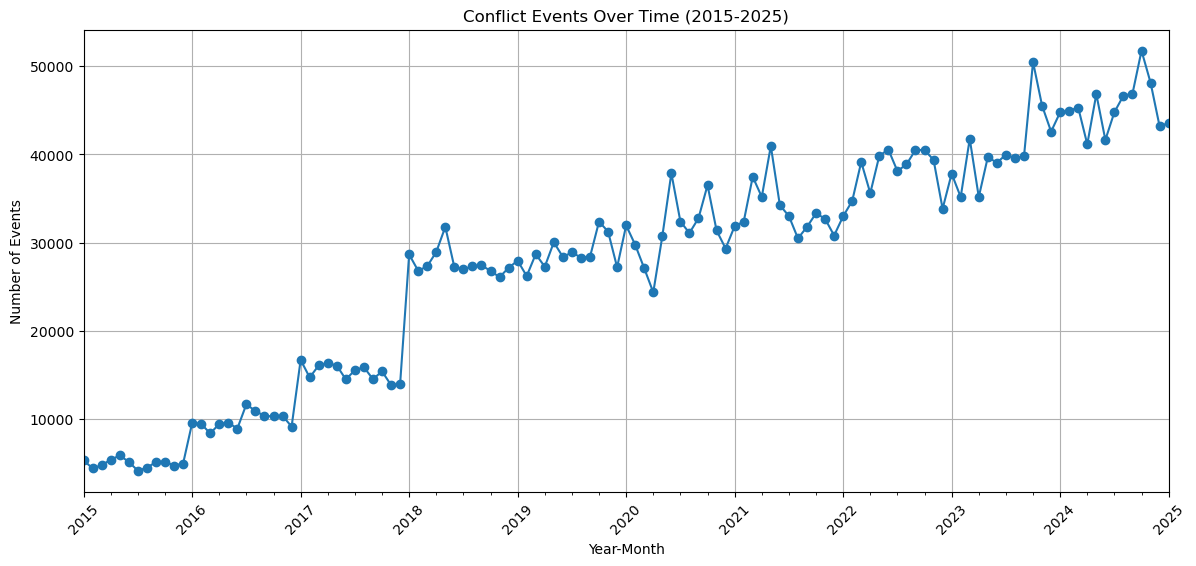

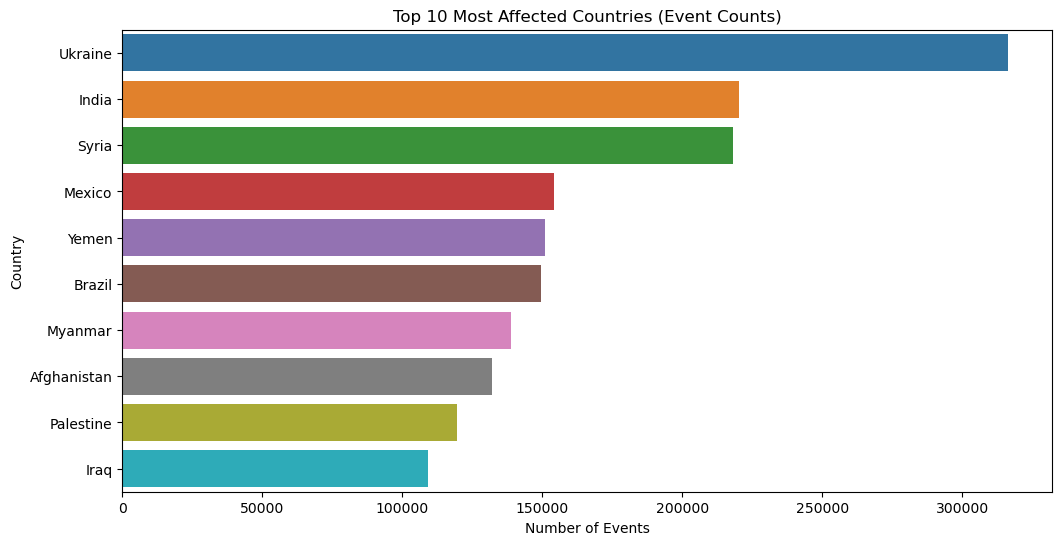

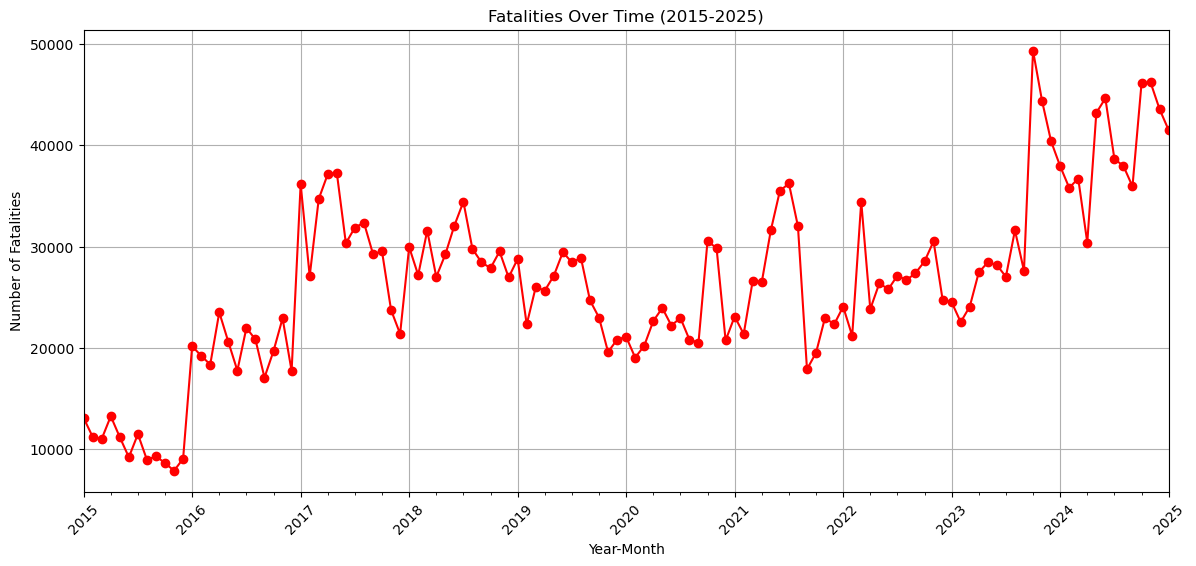

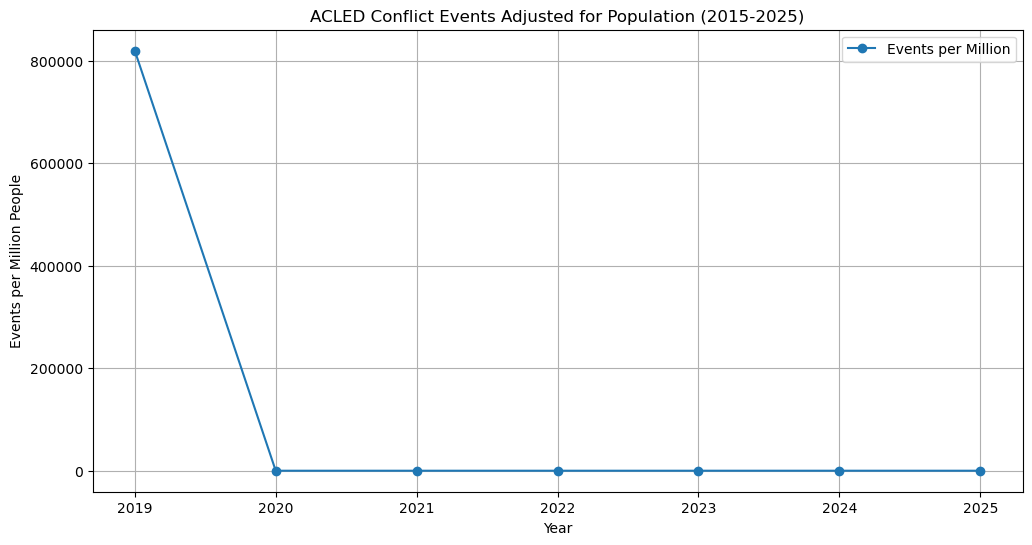

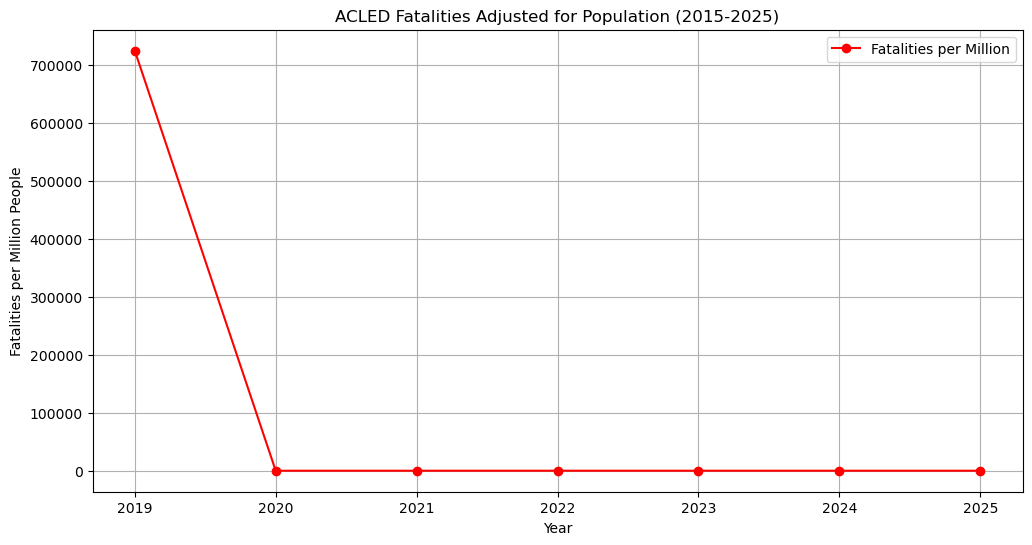

Full EDA Completed Successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import ace_tools as tools  # For displaying the final dataframe

# Load dataset
file_path = "ACLED_2015_1_1-2025_1_31_Global.csv"
df = pd.read_csv(file_path, sep=None, engine="python")

# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract year from date
df['year'] = df['event_date'].dt.year

# Convert relevant columns to numeric (handle errors)
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['population_best'] = pd.to_numeric(df['population_best'], errors='coerce')

# Check missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")

# Drop duplicates
df = df.drop_duplicates()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Count of event types
plt.figure(figsize=(12, 6))
sns.countplot(y=df['event_type'], order=df['event_type'].value_counts().index)
plt.title("Distribution of Event Types")
plt.xlabel("Count")
plt.ylabel("Event Type")
plt.show()

# Events over time
df['year_month'] = df['event_date'].dt.to_period('M')

plt.figure(figsize=(14, 6))
df['year_month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Conflict Events Over Time (2015-2025)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Most affected countries
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Most Affected Countries (Event Counts)")
plt.xlabel("Number of Events")
plt.ylabel("Country")
plt.show()

# Fatalities over time
plt.figure(figsize=(14, 6))
df.groupby('year_month')['fatalities'].sum().plot(kind='line', marker='o', color='red')
plt.title("Fatalities Over Time (2015-2025)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Group data by year for population-adjusted analysis
yearly_data = df.groupby("year").agg(
    total_events=('event_id_cnty', 'count'),
    total_fatalities=('fatalities', 'sum'),
    total_population=('population_best', 'sum')
).reset_index()

# Adjust for population size
yearly_data['events_per_million'] = (yearly_data['total_events'] / yearly_data['total_population']) * 1e6
yearly_data['fatalities_per_million'] = (yearly_data['total_fatalities'] / yearly_data['total_population']) * 1e6

# Plot Events Per Million Over Time
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['events_per_million'], marker='o', label='Events per Million')
plt.xlabel("Year")
plt.ylabel("Events per Million People")
plt.title("ACLED Conflict Events Adjusted for Population (2015-2025)")
plt.legend()
plt.grid()
plt.show()

# Plot Fatalities Per Million Over Time
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['fatalities_per_million'], marker='o', color='red', label='Fatalities per Million')
plt.xlabel("Year")
plt.ylabel("Fatalities per Million People")
plt.title("ACLED Fatalities Adjusted for Population (2015-2025)")
plt.legend()
plt.grid()
plt.show()

# Display the cleaned and analyzed dataset
# tools.display_dataframe_to_user(name="Yearly Population-Adjusted ACLED Data", dataframe=yearly_data)

print("Full EDA Completed Successfully!")

In [2]:
# Count rows where all values are null
fully_null_rows = df[df.isnull().all(axis=1)].shape[0]
print(f"Total rows that are completely null: {fully_null_rows}")

# Count events in Antarctica
antarctica_events = df[df['country'].str.lower() == 'antarctica'].shape[0]
print(f"Total events recorded in Antarctica: {antarctica_events}")

Total rows that are completely null: 0
Total events recorded in Antarctica: 9


In [3]:
df.shape

(3346505, 30)

In [5]:
pd.set_option('display.max_columns', None)
df.head(20)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best,year_month
0,BHR13387,2025-01-31,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Bahrain),February 14 Youth Coalition,5,50,NaN,48,Middle East,Bahrain,Capital,NaN,NaN,Al Akr,26.1431,50.6103,1,14 February Revolution Youth Coalition,Other,"On 31 January 2025, demonstrators, including F...",0,crowd size=no report,1738629507,827.0,2025-01
1,BHR13389,2025-01-31,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Bahrain),Labor Group (Bahrain),6,60,NaN,48,Middle East,Bahrain,Capital,NaN,NaN,Manama,26.2279,50.5857,1,LuaLua TV,National,"On 31 January 2025, for the second consecutive...",0,crowd size=no report,1738629507,49348.0,2025-01
2,BHR13390,2025-01-31,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Bahrain),February 14 Youth Coalition,6,60,NaN,48,Middle East,Bahrain,Capital,NaN,NaN,Manama,26.2279,50.5857,3,14 February Revolution Youth Coalition; LuaLua TV,Other-National,"On 31 January 2025, demonstrators, including F...",0,crowd size=no report,1738629507,49348.0,2025-01
3,BHR13392,2025-01-31,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Bahrain),February 14 Youth Coalition,5,15,NaN,48,Middle East,Bahrain,Capital,NaN,NaN,Sitrah,26.1547,50.6206,1,14 February Revolution Youth Coalition,Other,"On 31 January 2025, demonstrators, including F...",0,crowd size=no report,1738629507,1221.0,2025-01
4,BHR13392,2025-01-31,2025,1,Demonstrations,Riots,Violent demonstration,Police Forces of Bahrain (1999-),NaN,1,15,NaN,48,Middle East,Bahrain,Capital,NaN,NaN,Sitrah,26.1547,50.6206,1,14 February Revolution Youth Coalition,Other,"On 31 January 2025, demonstrators, including F...",0,crowd size=no report,1738629507,1221.0,2025-01
5,BOL6980,2025-01-31,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Bolivia),Students (Bolivia),6,60,NaN,68,South America,Bolivia,La Paz,Murillo,Nuestra Senora de La Paz,La Paz,-16.4957,-68.1336,1,El Diario (Bolivia),National,"On 31 January 2025, in La Paz (La Paz), reside...",0,crowd size=no report,1738629507,37584.0,2025-01
6,BOL6981,2025-01-31,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Bolivia),NaN,6,60,NaN,68,South America,Bolivia,Cochabamba,Quillacollo,Quillacollo,Quillacollo,-17.3923,-66.2784,1,El Diario (Bolivia),National,"On 31 January 2025, in Quillacollo (Cochabamba...",0,crowd size=no report,1738629507,14529.0,2025-01
7,BRA94009,2025-01-31,2025,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Brazil),NaN,3,33,NaN,76,South America,Brazil,Rio de Janeiro,Rio de Janeiro,NaN,Rio de Janeiro - West Zone,-22.9147,-43.4879,1,OTT-RJ,New media,"On 31 January 2025, in Rio de Janeiro - West Z...",0,NaN,1738629509,187707.0,2025-01
9,BRA94010,2025-01-31,2025,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Brazil),NaN,3,33,NaN,76,South America,Brazil,Rio de Janeiro,Rio de Janeiro,NaN,Rio de Janeiro - North Zone,-22.8569,-43.3008,1,OTT-RJ,New media,"On 31 January 2025, in Rio de Janeiro - North ...",0,NaN,1738629509,955701.0,2025-01
11,BRA94011,2025-01-31,2025,1,Political violence,Battles,Armed clash,Police Forces of Brazil (2023-) Civil Police,NaN,1,13,NaN,76,South America,Brazil,Rio de Janeiro,Sao Joao de Meriti,NaN,Sao Joao de Meriti,-22.8039,-43.3722,1,OTT-RJ,New media,"On 31 January 2025, in Sao Joao de Meriti (Rio...",0,NaN,1738629509,485483.0,2025-01


In [6]:
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp', 'population_best',
       'year_month'],
      dtype='object')

In [10]:
df[['admin1', 'admin2', 'admin3', 'location']].head(10)

,admin1,admin2,admin3,location
0,Capital,NaN,NaN,Al Akr
1,Capital,NaN,NaN,Manama
2,Capital,NaN,NaN,Manama
3,Capital,NaN,NaN,Sitrah
4,Capital,NaN,NaN,Sitrah
5,La Paz,Murillo,Nuestra Senora de La Paz,La Paz
6,Cochabamba,Quillacollo,Quillacollo,Quillacollo
7,Rio de Janeiro,Rio de Janeiro,NaN,Rio de Janeiro - West Zone
9,Rio de Janeiro,Rio de Janeiro,NaN,Rio de Janeiro - North Zone
11,Rio de Janeiro,Sao Joao de Meriti,NaN,Sao Joao de Meriti


In [12]:
df[['population_best', 'tags']].head(10)

,population_best,tags
0,827.0,crowd size=no report
1,49348.0,crowd size=no report
2,49348.0,crowd size=no report
3,1221.0,crowd size=no report
4,1221.0,crowd size=no report
5,37584.0,crowd size=no report
6,14529.0,crowd size=no report
7,187707.0,NaN
9,955701.0,NaN
11,485483.0,NaN
